# **NLP. Tarea 1: Python (Conferencias)**.

*Diego Moreno*

# 1. Construcción de un corpus.

A continuación la liga para la carpeta creada del corpus. Los datos se encuentran en la subcarpeta llamada ***estenograficas_limpias_por_fecha***.

https://drive.google.com/drive/folders/1HO27SlvNyk7LMBoA12112MkQ8wGj3XW5?usp=sharing

# 2. Vistazo a los datos.

Importamos las librerías neccesarias para la tarea:

In [181]:
import nltk
import glob
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.text import Text
from nltk.tokenize import TweetTokenizer 
from datetime import datetime
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

1. Colocamos todas las conferencias en un string y separamos:

In [12]:
str_conferencias = []

# Ciclo para abrir todos los archivos de las conferencias
for f_page in glob.glob('./corpus/*'):
    conf_i = open(f_page, 'r', encoding='utf-8').read()
    # Separamos la conferencia i por palabras separadas por espacio
    conf_s = conf_i.split()
    # Agregamos a la lista de conferencias
    str_conferencias += conf_s

2. Medimos la cantidad de palabras en las conferencias:

In [18]:
print('La cantidad de palabras en las conferencias:')
print(len(str_conferencias))

La cantidad de palabras en las conferencias:
5843211


3. Extraemos el vocabulario y medimos su longitud:

In [20]:
voca = set(str_conferencias)
print('Cantidad de palabras en las conferencias SIN repetición (Vocabulario):')
print(len(voca))

Cantidad de palabras en las conferencias SIN repetición (Vocabulario):
141701


4. Medimos la riqueza del vocabulario con la siguinete función para medir la diversidad:

In [23]:
def lexical_diversity(text):
    return len(text)/len(set(text))

def porcentaje(a, b):
    return 100*a/b

In [22]:
print('La riqueza del vocabulario:', lexical_diversity(str_conferencias))

La riqueza del vocabulario: 41.23620157938194


Si riqueza es de 41, esto nos dice que una palabra se usa en promedio 41 veces a lo largo de todas las conferencias.

Por otro lado, una palabra que dice mucho AMLO es «corrupción» veamos que tan frecuente es:

In [92]:
porcentaje(str_conferencias.count('corrupción')+str_conferencias.count('corrupción.')+
           str_conferencias.count('corrupción,')+str_conferencias.count('corrupción?')+str_conferencias.count('corrupción!'), 
           len(str_conferencias))

0.0832932440741914

Es alto el porcentaje en comparación de las palabras totales, puesto que equivale a 4867 veces cuando la riqueza del vocabulario es de 41 veces cada palabra.

Una de las famosas, es la frase «me canso ganso». Veamos que tan frecuente es la palabra «ganso».

In [96]:
str_conferencias.count('ganso')+str_conferencias.count('ganso,')+str_conferencias.count('ganso.')+str_conferencias.count('ganso!')+str_conferencias.count('ganso?')

40

Al parecer solo se ha dicho 40 veces en todas las conferencias :(

Finalmente, las 30 palabras más frecuentes son:


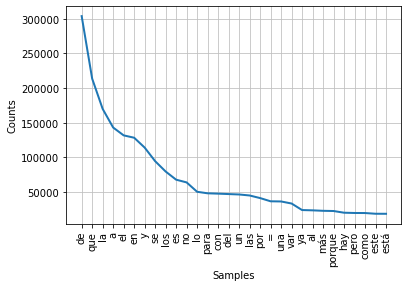

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
frec = FreqDist(str_conferencias)
frec.plot(30, cumulative=False)

Hasta ahora son solamente artículos, los cuales son palabras que comparten todos los documentos.

5. Hacemos la conversión a minúsculas y vemos los resultados de los pasos anteriores

5.1. Obtenemos las conferencias convirtiendo a minúsculas.

In [73]:
str_conf_low = []

# Ciclo para abrir todos los archivos de las conferencias
for f_page in glob.glob('./corpus/*'):
    # Convertimos a minúsculas con la funcion lower()
    conf_i = open(f_page, 'r', encoding='utf-8').read().lower()
    # Separamos la conferencia i por palabras separadas por espacio
    conf_s = conf_i.split()
    # Agregamos a la lista de conferencias
    str_conf_low += conf_s

5.2. Medimos la cantidad de palabras en las conferencias (debería ser el mismo):

In [74]:
print('La cantidad de palabras en las conferencias:')
print(len(str_conf_low))

La cantidad de palabras en las conferencias:
5843211


5.3. Extraemos el vocabulario y medimos su longitud (debe ser distinta y menor):

In [75]:
voca_low = set(str_conf_low)
print('Cantidad de palabras en las conferencias SIN repetición (Vocabulario):')
print(len(voca_low))

Cantidad de palabras en las conferencias SIN repetición (Vocabulario):
130912


Con lo que se bajo del orden de 140mil palabras en el vocabulario a 130mil.

5.4. Medimos la riqueza del vocabulario con la siguinete función para medir la diversidad:

In [77]:
print('La riqueza del vocabulario:', lexical_diversity(str_conf_low))

La riqueza del vocabulario: 44.634647702273284


La riqueza fue más pobre, pues de 41 subió a 44 dando como resultado que una palabra se repite en promedio 44 veces.

Por otro lado, la palabra «corrupción» tiene un porcentaje mayor al anterior con ocurrencias de 4914. La palabra de «ganso» ahora ocurre las mismas veces. 

In [97]:
porcentaje(str_conf_low.count('corrupción')+str_conf_low.count('corrupción.')+str_conf_low.count('corrupción,')+
           str_conf_low.count('corrupción!')+str_conf_low.count('corrupción?'), 
           len(str_conf_low))

0.0840975963387254

In [100]:
str_conf_low.count('ganso')+str_conf_low.count('ganso.')+str_conf_low.count('ganso,')+str_conf_low.count('ganso!')+str_conf_low.count('ganso?')

40

Finalmente las 30 palabras más frecuentes son:

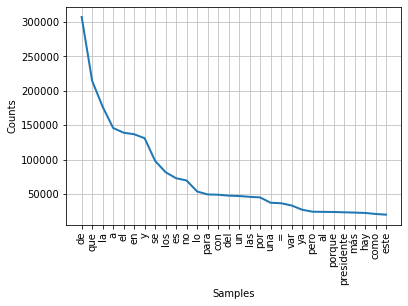

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [102]:
frec_low = FreqDist(str_conf_low)
frec_low.plot(30)

El cambio más notable fue en la palabra presidente la cual antes no aparecía como frecuente.

6. Usamos la funcion de RegExp de tokenizer de la librería NLTK

6.1. Obtenemos las conferencias tokenizando con regexp y agregando a un text de nltk

In [192]:
str_conf_regexp = []
# Tokenizador con expresion regular solo para letras mayúsculas o minúsculas
tokenizer = RegexpTokenizer('[A-Z]\w+|[a-z]\w+')

# Ciclo para abrir todos los archivos de las conferencias
for f_page in glob.glob('./corpus/*'):
    conf_i = open(f_page, 'r', encoding='utf-8').read()
    # Separamos la conferencia i por palabras separadas por espacio
    conf_s = tokenizer.tokenize(conf_i)
    # Agregamos a la lista de conferencias
    str_conf_regexp += conf_s

# Descargamos los datos de la lista a un Text
text_conf = Text(str_conf_regexp)

6.2. Medimos la cantidad de palabras en las conferencias:

In [193]:
len(text_conf)

5807509

6.3. Extraemos el vocabulario y medimos su longitud:

In [194]:
voca_text = set(text_conf)
print('Cantidad de palabras en las conferencias SIN repetición (Vocabulario): %d' % len(voca_text))

Cantidad de palabras en las conferencias SIN repetición (Vocabulario): 73770


Con lo cual se reduce drásticamente la cantidad de tokens.

7. Realizamos lo mismo para el copus pero ahora convirtiendo en minúsculas el texto y usando la función de tweetTokenizer:

7.1 Obtenemos los datos de la conferencia usando la función TweetTokenizer 

In [188]:
str_conf_ttok = []
# Creamos la clase TweetTokenizer 
ttokenizer = TweetTokenizer() 

# Ciclo para abrir todos los archivos de las conferencias
for f_page in glob.glob('./corpus/*'):
    # Leemos el texto en minúsculas
    conf_i = open(f_page, 'r', encoding='utf-8').read().lower()
    # Separamos la conferencia i por palabras separadas por espacio
    conf_s = ttokenizer.tokenize(conf_i)
    # Agregamos a la lista de conferencias
    str_conf_ttok += conf_s

# Descargamos los datos de la lista a un Text
text_conf_ttok = Text(str_conf_ttok)

7.2. Medimos la cantidad de palabras en las conferencias:

In [189]:
len(text_conf_ttok)

8167938

La cantidad de palabras con esta función sube a 8 millones cuando con regExp teniamos 5 millones. Esto es debido a que anteriormente no considerabamos números y al parecer, TweetTokenizer sí considera algún tipo de números.

7.3. Extraemos el vocabulario y medimos su longitud:

In [190]:
voca_ttok = set(text_conf_ttok)
print('Cantidad de palabras en las conferencias SIN repetición (Vocabulario): %d' % len(voca_ttok))

Cantidad de palabras en las conferencias SIN repetición (Vocabulario): 73682


Al final se obtiene una cantidad similar de palabras en el vocabulario. Por lo tanto, el trabajo anterior, puede ser resumido al solamente usar la función de TweetTokenizer. 

# 3. Funciones NLTK

1. Vemos el contexto en que se usan algunas palabras homógrafas y otras interesantes de saber el contexto. Por ejemplo las palabras «armando», «ganso», «bien», «vino» y «malo».

In [198]:
text_conf_ttok.concordance('armando')

Displaying 25 of 39 matches:
n entre los nombres , por ejemplo , armando casas , no sé si nos puede comentar
sco que cubrió sus campañas y jorge armando rocha gutiérrez que están en lo dig
linterpretar , es roger bartra , no armando bartra , porque armando bartra es u
bartra , no armando bartra , porque armando bartra es un hombre , también un in
municipal de ciudad juárez , héctor armando cabada . y estamos unidos porque de
mos pasar el video que nos ayudaron armando la gente de la cirt . no sé si lo t
diplomado del estado mayor , sergio armando barreras salcedo , que es comandant
ente al general de brigada , sergio armando barrera , y al final escribe : ‘ es
 y creo que también le prepusimos a armando bartra y también lo mismo , que pre
los nuevos herederos de zapata , de armando bartra ; o un ensayo de miguel ánge
ios . el tema del metrobús . estuvo armando navarro , delegado de morena en dur
n contralínea documentamos que juan armando hinojosa cantú es uno de los benefi
lave de rad

Notamos que en varias ocasiones se usa de manera de armar y otras como nombre propio, por lo que pudiera ser una confusión si no vemos el contexto.

In [186]:
text_conf_ttok.concordance('ganso')

Displaying 25 of 40 matches:
 para limpiar las aduanas y me canso ganso que lo vamos a lograr . reiteramos e
a acabar con la impunidad , me canso ganso . el problema de méxico no es la fal
establecida la democracia . me canso ganso . se va a acabar el fraude electoral
 va a acabar la impunidad . me canso ganso . pregunta : ( inaudible ) . preside
 va a caminar el elefante . me canso ganso . interlocutor : presidente , en el 
va a acabar la corrupción . me canso ganso . pero aquí hay la virtud de la hone
el , sin derecho a fianza . me canso ganso . entonces , no va a haber ninguna l
 acabar con la corrupción , me canso ganso , y con el apoyo del pueblo va a hab
sí como lo vengo diciendo : me canso ganso . va porque va . y lo vamos a hacer 
corrupción y la impunidad . me canso ganso , es en serio . estas empresas son l
 se acaba porque se acaba . me canso ganso . aunque haya protestas y presiones 
n y se acaba la impunidad . me canso ganso . pregunta : nada más para una preci
a a poder ,

La palabra ganso, nunca se refiere al animal en si. Se usa la mayoría de las veces como rima de la frase me canso ganso.

In [191]:
text_conf_ttok.concordance('bien')

Displaying 25 of 5762 matches:
 en martes , 28 de abril de 2020 muy bien . hoy es martes , informamos sobre l
ni por debajo de su pulso , está muy bien , no hay arritmias y desde luego est
n teniendo seguridad social y eso es bien importante en estas épocas . y lo he
 circunstancia especial porque no es bien visto el que se tenga que entregar a
 , decirle a la gente que se informe bien sobre esta situación para que no hay
del zócalo pueden estar 500 personas bien separadas y yo hice la propuesta , p
 en cuestiones legales , que si está bien lo de lozoya , no está bien , de ahí
 si está bien lo de lozoya , no está bien , de ahí hacia adelante . interlocut
u presupuesto , va a ser una empresa bien constituida para que no falten los m
el lópez obrador : dos semanas . muy bien , nos vemos mañana . - - - conferenc
a causa . yo creo que se ha avanzado bien y hacemos desde esta perspectiva una
manuel lópez obrador : buenos días . bien , ya conocen sobre la propuesta . co
tenemos que descansar

La palabra bien es otra de las que tenemos que tomar muy en cuenta el contexto en el que está descrita porque varias veces se refiere a que está todo bien, y otras a que no está bien. Se tiene que fijar en la palabra «no» para darle el significado.

In [193]:
text_conf_ttok.concordance('vino')

Displaying 25 of 189 matches:
star antier el nuncio con nosotros , vino a una reunión y no planteó eso , nos
r las comisiones ; y ahora regresó y vino a informarme que ya se iba a iniciar
a mañana , no quisimos presentarlo , vino la secretaria de la función pública 
bebidas alcohólicas y seis litros de vino , sólo para pasajeros mayores de 18 
o quiero decir que es una crisis que vino de fuera , como antes , que se habla
 se les olvida que no se puede poner vino nuevo en botellas viejas , pero ahí 
créditos a pequeños negocios . ahora vino la crisis , cerraron muchos negocios
 la gran tragedia lo trajeron ; pues vino a dañar más a méxico , todavía vendi
bueno , vamos a ver con joselyn . no vino . claudia . pregunta : gracias , pre
riores , le drian , de francia , que vino aquí a la ciudad de méxico ; y el pr
de estados unidos . ¿ está aquí ? no vino . vámonos con dos . pregunta : buen 
resenciaron un milagro , el brazo se vino saltando de no sé dónde hasta el lug
ta . eso fue el period

Vino es otra palabra homógrafa, la cual muchas veces se refiere al verbo venir, pero una que otra vez es a la bebida alcohólica, por ejemplo en la cuarta oración.

In [189]:
text_conf_ttok.concordance('malo')

Displaying 25 of 90 matches:
astocada , estoy de acuerdo y es muy malo . qué bueno que llegó usted a la pre
e normal , como que no tiene nada de malo . estamos cambiando estas cosas y es
ón de méxico . a ver si … es que soy malo para recordar autores y títulos , pe
empresa . usted mucho a dicho que lo malo no termina no de morir . rcu manipul
 porque no todo lo del extranjero es malo , desgraciadamente se copia lo malo 
 malo , desgraciadamente se copia lo malo . hay muchas cosas buenas en otros p
 , el pueblo , el ser humano , no es malo por naturaleza , son las circunstanc
ir entre lo que es bueno y lo que es malo . ya no hay gente manipulable . clar
hacer lo que sea y además es legal ; malo sería que tomaran el camino de las c
ucha violencia . el ser humano no es malo por naturaleza , el mexicano no es m
o por naturaleza , el mexicano no es malo , son las circunstancias las que lle
 cumplí . ¿ y qué ha sucedido ? nada malo ; al contrario , hay armonía porque 
r , entender que el ser

Malo es empleado para decir que alguien es malo para algo (oración 3). También es usado para una frase positiva como decir: malo sería que estuvieramos gastando más. Otras veces es acompañada de la palabra no y finalmente, también tiene el significado de que algo es malo en general. La palabra «malo» parece ser una de las más complicadas en entender bajo el contexto.

7.2 Buscamos las palabras de usos similares de la palabra «gobernante».

In [203]:
text_conf_ttok.similar('gobernante')

gobierno estado ejemplo país presidente año programa caso acuerdo día
hospital tema plan momento tiempo trabajo apoyo problema pueblo cambio


Muestra resultados muy parecidos que sí tienen que ver con la palabra gobernante, por ejemplo de las más adecuadas son: gobierno, estado, país, presidente, trabajo, apoyo, problema y pueblo.

7.3. Realizamos un corpus con las 535 conferencias ordenadas, donde el inicio del texto corresponde a la conferencia más antigua y el final del texto, a la conferencia más nueva. Después realizamos un dispertion plot para ver las palabras más usadas a lo largo de las conferencias.

In [3]:
# Podemos usar este ordenamiento más sencillo que conviertiendo a fecha
pages = [f_page[9:] for f_page in glob.glob('./corpus/*')]
pages.sort()

for i in range(len(pages)):
    pages[i] = './corpus/'+pages[i]

In [290]:
# Si tenemos que hacerlo convirtiendo a fecha, aquí está el código:
pages = [f_page[9:] for f_page in glob.glob('./corpus/*')]
for i in range(len(pages)):
    if len(pages[i])>10 and pages[i][11]=='2':
        pages[i] = pages[i][:10] + 'T02'
    elif len(pages[i])>10 and pages[i][11]=='3':
        pages[i] = pages[i][:10] + 'T03'
        

pages_date = [datetime.fromisoformat(page) for page in pages]
pages_date.sort()

pages = [date.strftime('%Y-%m-%d_%H') for date in pages_date]
for i in range(len(pages)):
    if pages[i][12]=='2':
        pages[i] = './corpus/'+ pages[i][:10] + '_2da'
    elif pages[i][12]=='3':
        pages[i] = './corpus/'+ pages[i][:10] + '_3ra'
    else:
        pages[i] = './corpus/'+ pages[i][:10]

Leemos las conferencias en orden y aplicamos la dispersión:

In [5]:
str_conf_ttok_sorted = []
# Creamos la clase TweetTokenizer 
ttokenizer = TweetTokenizer() 

# Ciclo para abrir todos los archivos de las conferencias
for f_page in pages:
    # Leemos el texto en minúsculas
    conf_i = open(f_page, 'r', encoding='utf-8').read().lower()
    # Separamos la conferencia i por palabras separadas por espacio
    conf_s = ttokenizer.tokenize(conf_i)
    # Agregamos a la lista de conferencias
    str_conf_ttok_sorted += conf_s

# Descargamos los datos de la lista a un Text
text_conf_ttok_sorted = Text(str_conf_ttok_sorted)

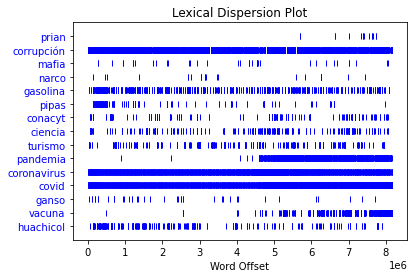

In [6]:
text_conf_ttok_sorted.dispersion_plot(['prian', 'corrupción', 'mafia', 
                                       'narco', 'gasolina', 'pipas', 
                                       'conacyt', 'ciencia', 'turismo',
                                       'pandemia', 'coronavirus', 'covid',
                                       'ganso', 'vacuna', 'huachicol'])

Notamos que la palabra prian es menciona últimamente, mientras que la palabra pipas fue mencionada al inicio del sexenio de AMLO cuando México se quedó sin gasolina. La palabra gasolina, al parecer es mencionada en la mayoría de las conferencias a lo largo del tiempo, similarmente pasa con la palabra corrupción que es mencionada con mayor intensidad. La palabra covid y coronavirus, no muestran una dispersion real, porque al meternos al texto, en cada conferencia viene la parabra COVID-19 y coronavirus como parte del título o presentación. Sin embargo, la palabra pandemia sí muestra una situación real al ser mostrada casi a la segunda mitad de las conferencias.

De las palabras que agregué fueron ganso, vacuna y huachicol. La palabra ganso la menciona muchas veces y casi similar a la palabra mafia. La palabra vacuna sí muestra el efecto de ser una palabra reciente. La de huachicol, al parecer, sí se mencionava repetidamente al principio del sexenio cuando fue lo de la gasolina.

Las demás palabras se mencionan esparcidamente a lo largo del año.

7.4. Mostramos 50 colocaciones del texto

In [316]:
text_conf_ttok_sorted.collocations(50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; estados
unidos; buenos días; por ciento; versión estenográfica; señor
presidente; todos los; prensa matutina; new date; span class; please
provide; nada más; input type; jp-carousel-comment-form-field jp-
carousel-comment-form-text-field; desde luego; muchas gracias; guardia
nacional; por eso; adultos mayores; por ejemplo; marcelo ebrard;
derechos humanos; mil millones; shutter speed; full size; view full;
focal length; todas las; error posting; muy importante; u00d7
<\/span>; sin embargo; email address; creo que; <\/fieldset>
<fieldset>; matutina del; sobre todo; tiene que; por qué; para que;
coronavirus covid; ver con; que nos; baja california; please try;
custom javascript; muy bien


7.5. Mostramos un histograma de las longitudes de las palabras

In [143]:
# Longitud de las palabras
words = set(text_conf_ttok_sorted)
long_w = [len(w) for w in words]
long_w.sort()

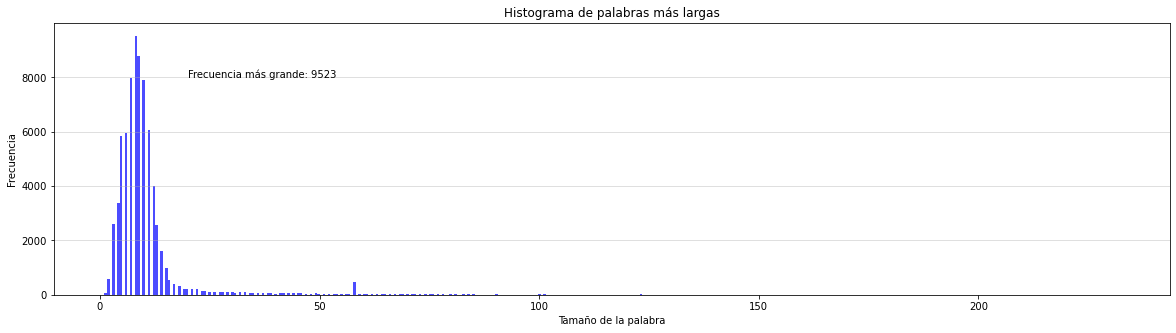

In [171]:
plt.figure(figsize=(20,5))
n, bins, patches = plt.hist(x=long_w, bins=400, color='blue', alpha=.7)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Tamaño de la palabra')
plt.ylabel('Frecuencia')
plt.title('Histograma de palabras más largas')
maxfreq = n.max()
plt.text(20, 8000, 'Frecuencia más grande: %d' % maxfreq)
plt.show()

Ahora, nos acercamos un poco hacia pequeñas frecuencias para poder mostrar el top 5 de las palabras más grandes en el histograma.

En color rojo se marcan las 5 longitudes más largas correspondientes a 199, 207, 209, 211 y 232 caracteres de longitud.

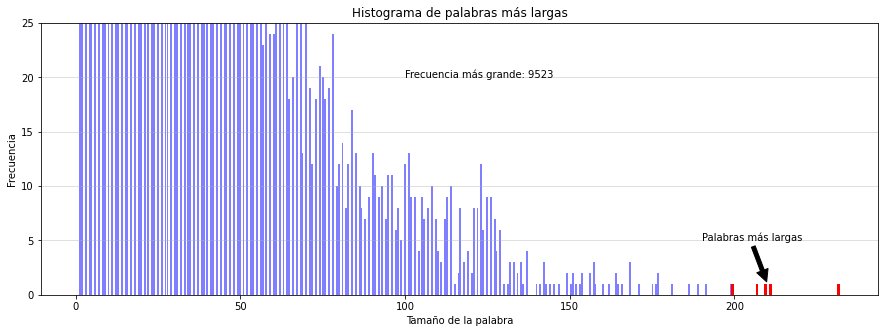

In [172]:
plt.figure(figsize=(15,5))
n, bins, patches = plt.hist(x=long_w, bins=400, color='blue', alpha=.5)
plt.hist(x=long_w[-5:], bins=40, color='red', alpha=1)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Tamaño de la palabra')
plt.ylabel('Frecuencia')
plt.title('Histograma de palabras más largas')
maxfreq = n.max()
plt.text(100, 20, 'Frecuencia más grande: %d' % maxfreq)
plt.ylim(ymax=25)
plt.annotate('Palabras más largas', xy=(210, 1), xytext=(190, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

7.6. Ahora encontramos palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 en todo
el texto.

In [125]:
# Palabras largas mayores a 8 caracteres
words = text_conf_ttok_sorted
long_w = [w for w in words if len(w)>8]

In [126]:
# Agregamos a una lista las palabras que tengan frecuencia mayor a 5
long_w_freq = FreqDist(long_w)
list_long_w = [w for w in long_w_freq.keys() if long_w_freq[w]>5]

#Mostramos 50 palabras de ellas
list_long_w[:50]

['estenográfica',
 'conferencia',
 'presidente',
 'tmm_lang_no_events',
 'lang_january',
 'lang_february',
 'lang_march',
 'lang_april',
 'lang_june',
 'lang_july',
 'lang_august',
 'lang_september',
 'september',
 'lang_october',
 'lang_november',
 'lang_december',
 'lang_sunday',
 'lang_monday',
 'lang_tuesday',
 'lang_wednesday',
 'wednesday',
 'lang_thursday',
 'lang_friday',
 'lang_saturday',
 'lang_today',
 'lang_month',
 'lang_week',
 'lang_time',
 'lang_place',
 'error_fetching_events',
 'events_time_format',
 'events_date_format',
 '#wpadminbar',
 'is_single_page',
 'breadcumbs',
 'definitions',
 'https://presidente.gob.mx',
 'capcha_image_url',
 'https://presidente.gob.mx/wp-content/themes/diplomat/helper/capcha/image.php/',
 'template_directory',
 'https://presidente.gob.mx/wp-content/themes/diplomat/',
 'https://presidente.gob.mx/wp-admin/admin-ajax.php',
 'ajax_nonce',
 'f72e8039a7',
 'lang_enter_correctly',
 'lang_sended_succsessfully',
 'successfully',
 'lang_server_fail

7.7. Realizamos una gráfica de frecuencias condicionales para las palabras «mafia» y «prian» para ver si están relacionadas y que la mafia sea el prian.

In [133]:
def words_file(file):
    '''
    Función que abre un archivo específico y regresa una lista con
    las palabras que contiene el texto. Usa la función TweetTokenizer.
    '''
    # Creamos la clase TweetTokenizer 
    ttokenizer = TweetTokenizer() 
    # Abrimos el archivo
    conf_i = open(file, 'r', encoding='utf-8').read().lower()
    # Separamos la conferencia i por palabras separadas por espacio
    conf_s = ttokenizer.tokenize(conf_i)
    return conf_s

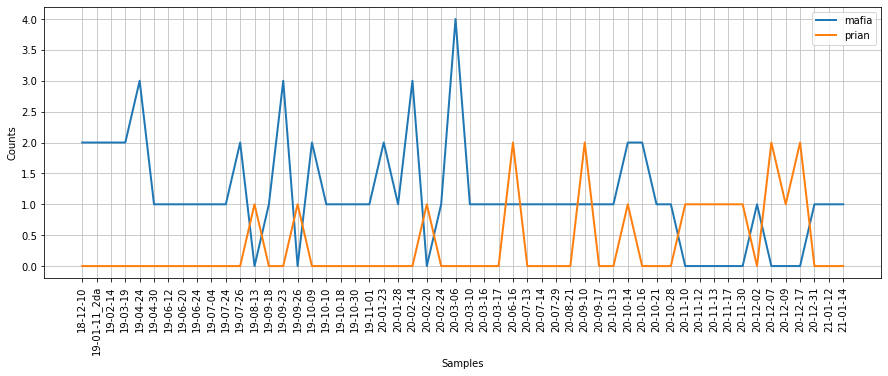

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [156]:
cfd = nltk.ConditionalFreqDist(
    for fileid in pages
    for w in words_file(fileid)
    for target in ['mafia', 'prian'] 
    if w.lower().startswith(target))
plt.figure(figsize=(15,5))
cfd.plot()

Podemos notar que al princio la palabra mafia se usaba mientras que prian no, sin embargo, cuando no se usó mafia se uso la palabra prian. Después, en medio de las conferencias se mencionan ambas palabras. Las ultimas fechas vuelve a ser el patrón de mencionar mafia o mencionar prian.

7.8. Usamos la lista de stopwords para obtener la cantidad de palabras en los datos con y
sin stopword.

In [184]:
# Obtenemos la lista de stop words para español
stopWords = set(stopwords.words('spanish'))

In [185]:
# Filtramos nuestro texto con las stopwords anteriores
wordsFiltered = []

for w in text_conf_ttok_sorted:
    if w not in stopWords:
        wordsFiltered.append(w)

In [186]:
# Comparamos la cantidad de palabras
print('Cantidad de palabras en texto CON stopwords: %d' % len(text_conf_ttok_sorted))
print('Cantidad de palabras en texto SIN stopwords: %d' % len(wordsFiltered))

Cantidad de palabras en texto CON stopwords: 8167938
Cantidad de palabras en texto SIN stopwords: 5323969


7.9. Finalmente, mostramos las 300 palabras más frecuentes en las conferencias sin tomar en cuenta stop-words. 

In [195]:
# Frecuencia de las palabras sin stopwords
freq_sw = FreqDist(wordsFiltered)

In [249]:
# Las 300 palabras con más frecuencia
mostComm_w = [t[0] for t in freq_sw.most_common(300)]

# Las imprimimos ordenadamente
for w in mostComm_w:
    if len(w)>7:
        if len(w)>14:
            print(w, end='\t\t')
        else:
            print(w, end='\t')
    else:
        print(w, end='\t\t')

,		"		.		:		=		(		;		)		/		var		presidente	?		\		{		}		¿		!		'		si		[		manuel		lópez		obrador		andrés		va		0		vamos		entonces	]		méxico		-		|		mil		&		gobierno	);		function	i		1		r		=\		aquí		pregunta	comment		t		ver		ahora		dos		nacional	caso		*		país		días		van		n		<		>		hacer		+		usted		cómo		ser		ahí		%		salud		millones	gente		ak		gracias		señor		tema		así		bueno		decir		tener		pesos		_		if		your		manera		bien		importante	puede		año		hoy		s		‘		pues		parte		pueblo		ciento		…		mismo		día		prensa		información	general		’		buenos		corrupción	personas	tiempo		tres		hace		seguridad	años		please		https		important	interlocutor	unidos		ayer		todas		interlocutora	luego		secretaría	return		class		poder		muchas		ustedes		acuerdo		haciendo	voy		programa	sólo		conferencia	:\		};		t.supports	además		trabajo		pública		federal		haber		ciudad		empresas	ejemplo		dar		cada		secretario	19		semana		toda		casos		id		to		name		js		text		apoyo		siempre		política	creo		momento		vida		20		mexicanos	trabajado

# 4. Otras librerías de Python

4.1. Existen varias librerías para el procesamiento de lenguaje en Python. De las más usadas en 2020 me llamaron la atención las siguientes librerías:

* SpaCy: 
    * Ventaja: Una de las ventajas de esta librería contra NLTK es que SpaCy tiene mejor desempeño en tiempo para la tokenización de palabras y el part-of-speech tagging. Además, admite vectores de palabras, que de manera contraria, NLTK no.
    * Desventaja: SpaCy contiene el mejor algoritmo para la resolución de un problema, cosa que veo problemática pues al momento de hacer investigación no podrás tener variedad o facilidad de hacer cosas nuevas.
    
* TextBlob:
    * Ventaja: La ventaja más grande que tiene esta librería es que más útil y tiene mejor desempeño en eficiencia en cuanto a tareas relacionadas con Natural Language Understanding como lo es: análisis del sentimiento, extracción de relaciones y análisis semántico.
    * Desventaja: TextBlob es una librería basada en NLTK. No se si por eso, TextBlob es muy lento. Además no cuenta con modelos de redes neuronales ni maneja vectores de palabras (tampoco NLTK).

4.2 Existen varias alternativas para el proceso de texto en NLP a parte del uso del lenguaje Python. Por ejemplo:

* CoreNLP: Es una libreria para Java con soporte de la universidad de Stanford.
    * Ventaja: Cuenta con una robusta y rápida serialización de los objetos que se manejan en Java.
    * Desventaja: No tienes variedad ni facilidad de camibar o hacer cosas nuevas. Aunque tiene la capacidad de pasar propiedades a algo que se llaman anotadores, es muy lento en comparación con hacer las anotaciones directamente, por lo que no se recomienda.
    
* Apache OpenNLP: Es una librería también para Java y también de las más usadas en R.
    * Ventaja: La ventaja de OpenNLP es que no es necesario ingresar manualmente especificaciones, restricciones y léxicos. Tiene como objetivo maximizar la entropía automaticamente permitiendo recopilar hechos de manera uniforme. 
    * Desventaja: Aunque con ventaja de maximizar la entropía se obtiene una alta precisión, la desventaja es que produce bastantes falsos negativos.
  
* text2vec: Es una libreria programada en C++ para uso multiplataforma.
    * Ventaja: Tiene una vectorizacion (creación de matrices documento-términos) súper rapida en los n-gramas, vocabulario y hashing.
    * Desventaja: No tiene tanto soporte y por consiguiente no cuenta con modelos grandes preentrenados para varios idiomas.